In [1]:
## Exploring results
#http://www.bioconductor.org/packages/release/bioc/vignettes/DESeq2/inst/doc/DESeq2.html

In [ ]:
source("https://bioconductor.org/biocLite.R")
biocLite("pheatmap")

In [2]:
library("DESeq2")
library("tximport")
library("readr")
library("tximportData")
library("IHW")
library("vsn")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min


Attaching packag

In [3]:
setwd("/home/gstupp/projects/Wolan/cmoon/CM7_CM1E2d56col_unenr123_rawextract_2017/")

In [4]:
file_path = "out/df.csv"
countData = read.csv(file_path, row.names = 1)

In [5]:
meta_path = "data/metadata.csv"
sampleTable = read.csv(meta_path, row.names = 1)
sampleTable = sampleTable[colnames(countData),]
sampleTable$technical=sampleTable$biological
sampleTable$technical=factor(sampleTable$technical)
sampleTable$RTcontrol=factor(sampleTable$RTcontrol)
sampleTable$treatment=factor(sampleTable$treatment)
sampleTable$RTcontrol <- relevel(sampleTable$RTcontrol, ref="control")
sampleTable$treatment <- relevel(sampleTable$treatment, ref="WT")
#sampleTable

In [6]:
file_path = "out/locus_df.csv"
locusTable = read.csv(file_path, row.names = 1)

In [7]:
dds = DESeqDataSetFromMatrix(countData, colData = sampleTable, ~ technical + RTcontrol)
dds <- DESeq(dds)
res <- results(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [8]:
res

log2 fold change (MLE): RTcontrol RT vs control 
Wald test p-value: RTcontrol RT vs control 
DataFrame with 5610 rows and 6 columns
           baseMean log2FoldChange     lfcSE       stat     pvalue      padj
          <numeric>      <numeric> <numeric>  <numeric>  <numeric> <numeric>
132035     2.733255     -4.5641813 3.3675580 -1.3553386 0.17530971        NA
268176     2.846130      5.4496694 2.5926590  2.1019615 0.03555665        NA
318873     7.173777      0.2190211 0.8205505  0.2669197 0.78953098 0.9519515
407882     3.928710      6.0105225 2.2911087  2.6234121 0.00870539 0.1279841
496339    64.478742     -0.6049383 0.8673116 -0.6974866 0.48549831 0.9006200
...             ...            ...       ...        ...        ...       ...
168237364  7.118263     0.77821582 1.2060138  0.6452794  0.5187462 0.9006200
168248340 26.636096    -0.74803296 0.6750204 -1.1081635  0.2677912 0.7526884
168249536  2.059860    -3.11639294 3.4624818 -0.9000460  0.3680958        NA
168249633 15.600078  

In [9]:
resultsNames(dds)

[1] "Intercept"               "technical_2_vs_1"       
[3] "technical_3_vs_1"        "RTcontrol_RT_vs_control"

In [10]:
resLFC <- lfcShrink(dds, coef=4, res=res)
resLFC

log2 fold change (MAP): RTcontrol RT vs control 
Wald test p-value: RTcontrol RT vs control 
DataFrame with 5610 rows and 5 columns
           baseMean log2FoldChange       stat     pvalue      padj
          <numeric>      <numeric>  <numeric>  <numeric> <numeric>
132035     2.733255     -0.7682642 -1.3553386 0.17530971        NA
268176     2.846130      2.1632056  2.1019615 0.03555665        NA
318873     7.173777      0.1277864  0.2669197 0.78953098 0.9519515
407882     3.928710      2.6948678  2.6234121 0.00870539 0.1279841
496339    64.478742     -0.3606844 -0.6974866 0.48549831 0.9006200
...             ...            ...        ...        ...       ...
168237364  7.118263     0.53561425  0.6452794  0.5187462 0.9006200
168248340 26.636096    -0.66102704 -1.1081635  0.2677912 0.7526884
168249536  2.059860    -0.71863669 -0.9000460  0.3680958        NA
168249633 15.600078     0.03522863  0.1178413  0.9061934 0.9669633
168252212 23.796249     0.63837795  1.1225526  0.2616276 0.74441

In [11]:
resOrdered <- res[order(res$padj),]

In [12]:
summary(res)


out of 5610 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 161, 2.9% 
LFC < 0 (down)   : 146, 2.6% 
outliers [1]     : 0, 0% 
low counts [2]   : 435, 7.8% 
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [13]:
## exploring

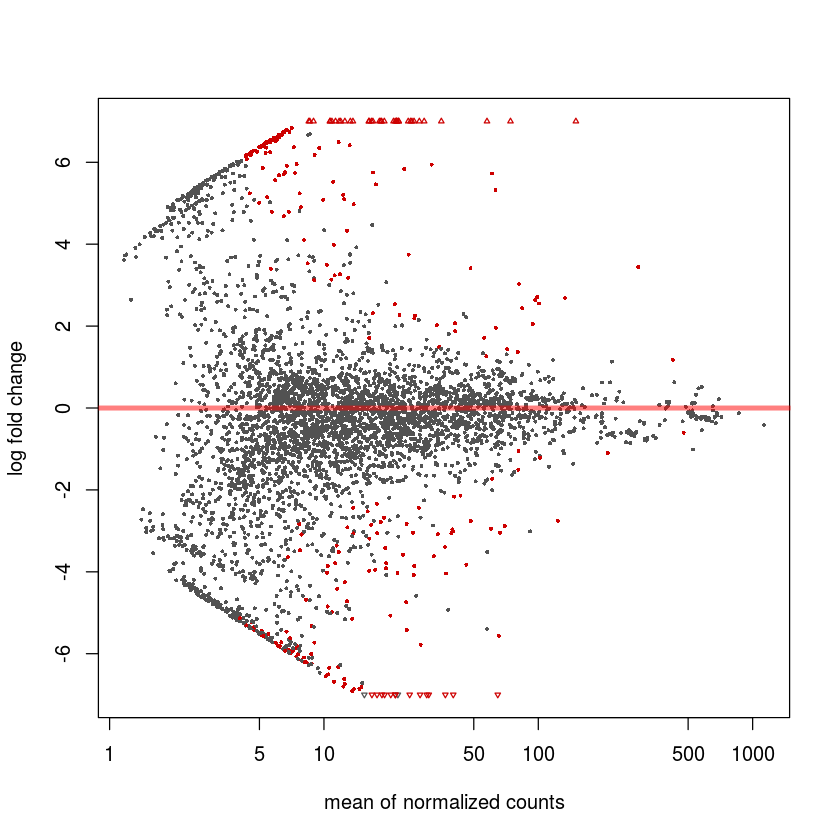

In [14]:
plotMA(res, ylim=c(-7, 7))

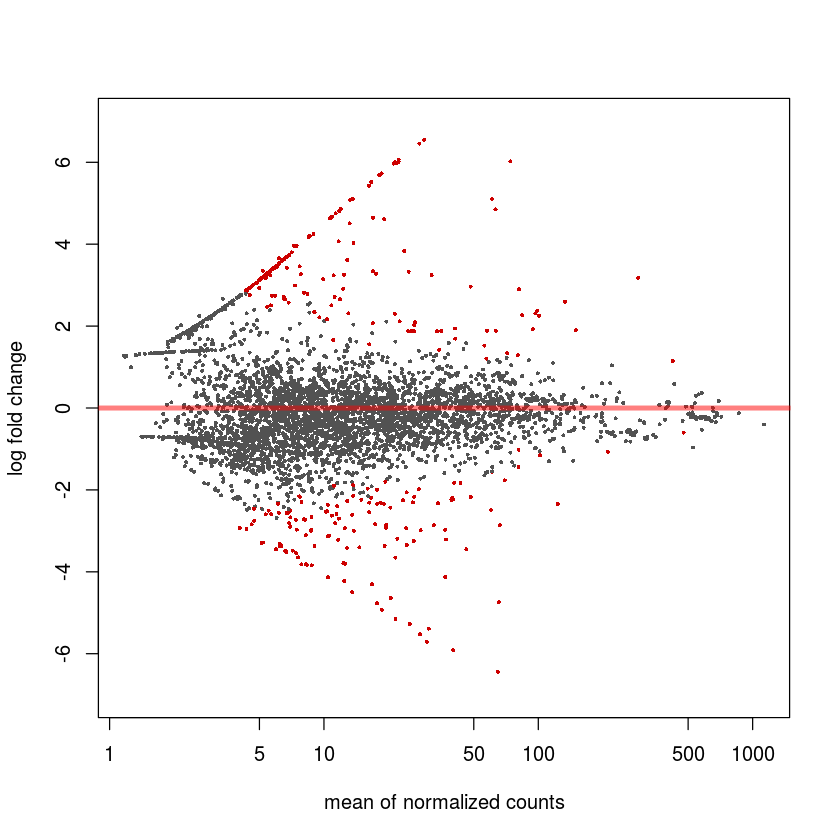

In [15]:
plotMA(resLFC, ylim=c(-7,7))

In [16]:
rld <- rlog(dds, blind=FALSE)
vsd <- varianceStabilizingTransformation(dds, blind=FALSE)
vsd.fast <- vst(dds, blind=FALSE)
head(assay(rld), 3)

,RTsep_unenr1,RTsep_unenr2,RTsep_unenr3,Ragsep_unenr1,Ragsep_unenr2,Ragsep_unenr3,WTsep_unenr1,WTsep_unenr2,WTsep_unenr3
132035,0.2377656,0.2473192,0.234136,1.591298,1.0404077,1.6660601,0.2443299,0.2456883,0.2379325
268176,0.9547532,1.4840419,1.890509,0.230408,0.2263581,0.2246233,0.2239850,0.2254492,0.2170809
318873,2.3411647,3.0639245,2.809088,2.329029,2.5480246,3.2613907,2.1244089,2.7368644,2.9910240


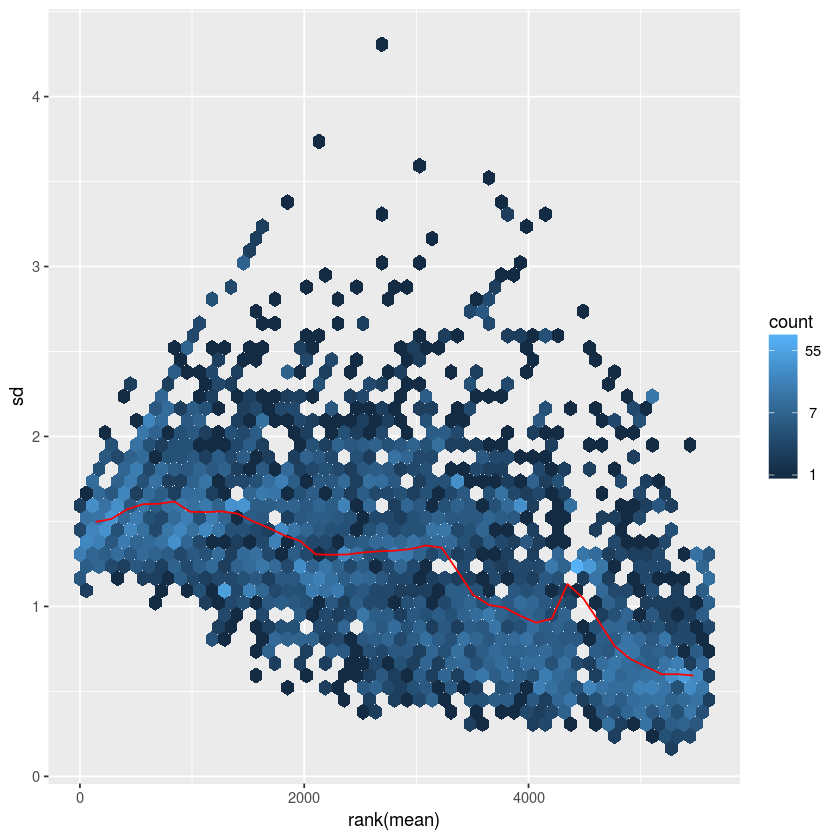

In [17]:
# this gives log2(n + 1)
ntd <- normTransform(dds)
library("vsn")
notAllZero <- (rowSums(counts(dds))>0)
meanSdPlot(assay(ntd)[notAllZero,])

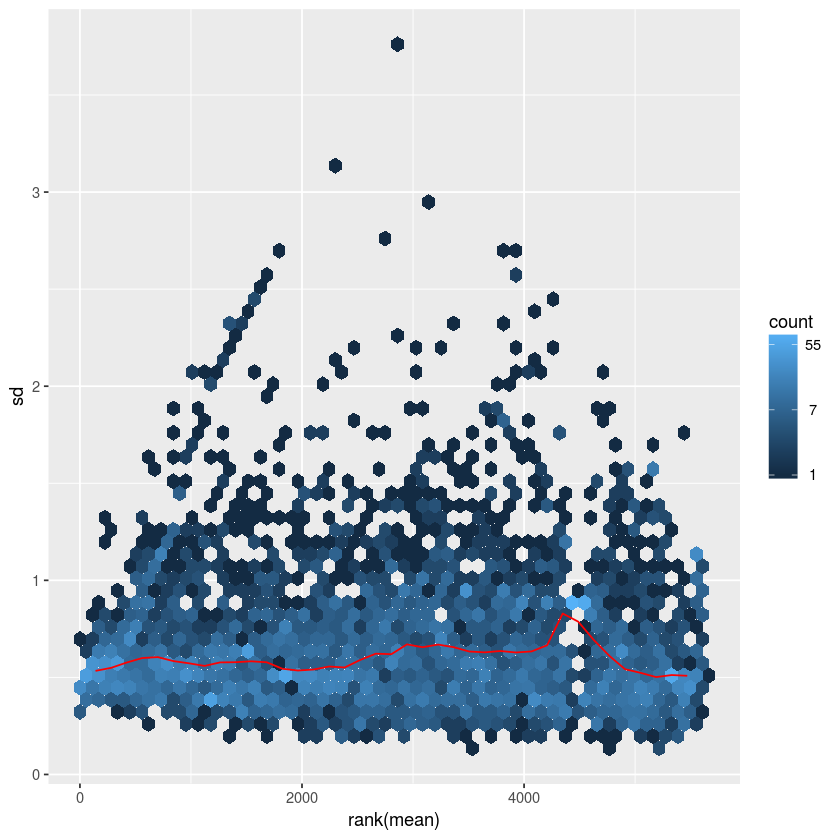

In [18]:
meanSdPlot(assay(rld[notAllZero,]))


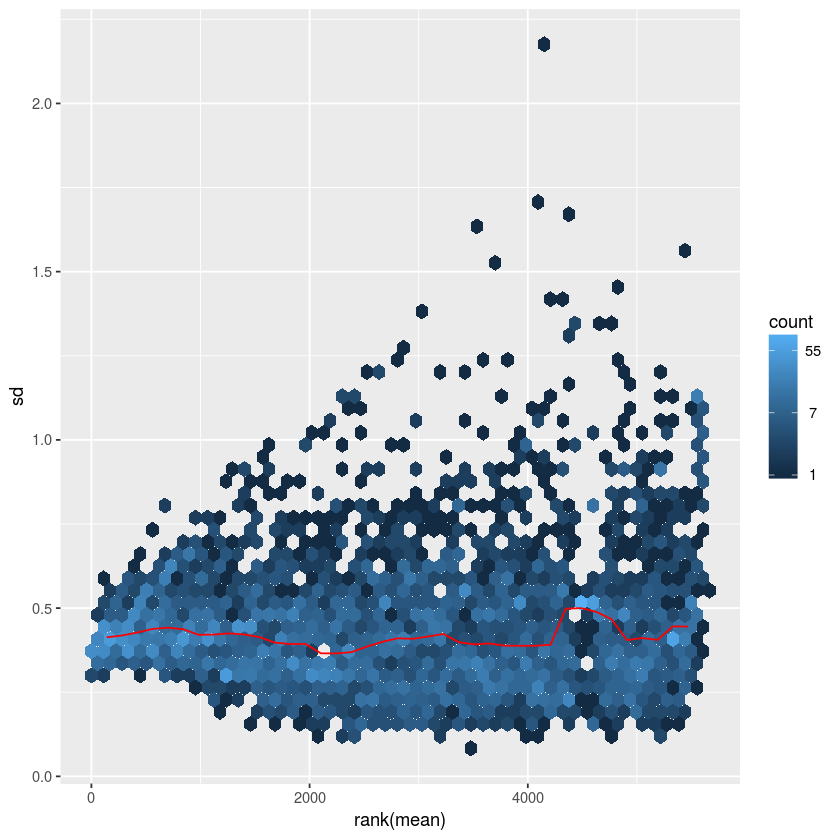

In [19]:
meanSdPlot(assay(vsd[notAllZero,]))


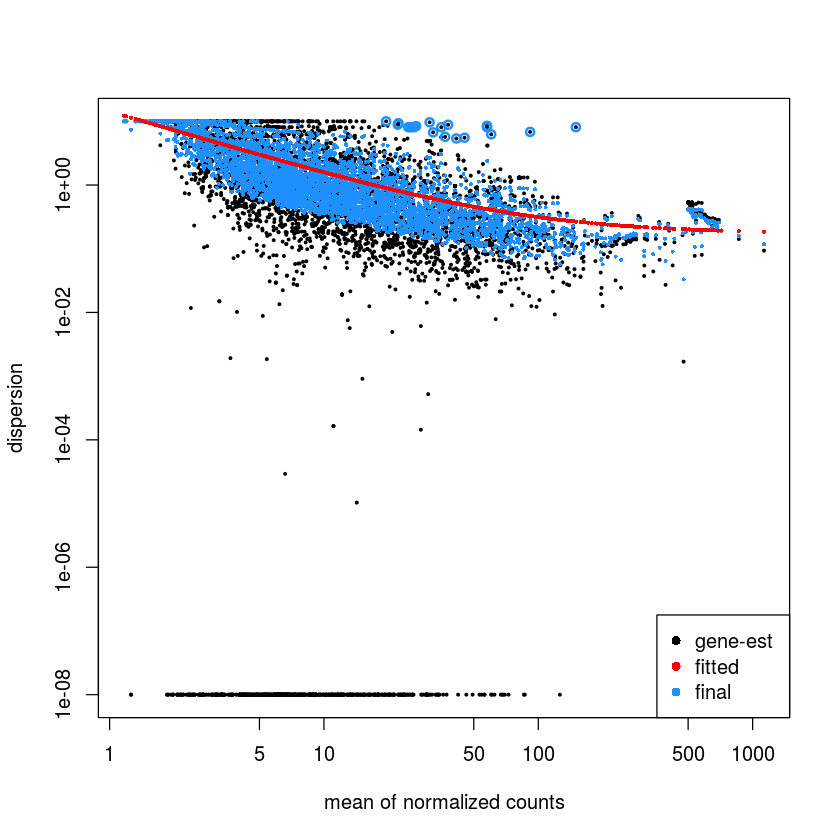

In [20]:
plotDispEsts(dds)